# This notebook shows the codes for the "Network embedding" module

In [1]:
%pip install -q -r requirements2.txt
%pip list|grep tbb

Note: you may need to restart the kernel to use updated packages.
tbb                           2021.2.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
sys.path.append("..")
import pandas as pd
import os
from src.embedding.fast_network_embedding import *
from src.eda.eda_functions import (plot_sig_perc, cluster_phenotype_corr, plot_corr_kde,
                                   cluster_jaccard_v2, run_kmeans, cluster_DE_perc, cluster_nmi_v3,
                                   plot_gene_cnt_each_cluster_v2)

# Run embedding

In [3]:
%%time
#from sys import platform
#prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'
#emb_df = network_embedding_fast(prefix+'/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv',
#                                max_epoch=100, learning_rate=0.1,
#                                output_path='Data/Module 5 outputs/embedding.csv')
emb_df = network_embedding_fast('../data/Kapoor_TOM.csv',
                                max_epoch=100, learning_rate=0.1,
                                output_path='../data/notebooks/Module 5 outputs/embedding.csv')

using read_adjacency not read_edgelist
memory0 10575.41796875
elist size 0 57878489604
nnodes: 19911 dtype: <class 'numpy.uint16'>
memory1 10574.54296875
elist size 1 57878489604
memory2 5911.046875
elist size 2 2378568204
memory3 5910.41015625
elist size 3 2378568204
before elist.copy
memory4 7801.234375
memory4a 18578.65234375
memory5 13159.16015625
memory6 13159.16015625
memory7 6983.4765625
memory8 12270.5
read_adjacency success


/Users/gzheng/venv/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10003. The TBB threading layer is disabled.
  warnings.warn(problem)


fit_transform success
embedding data saved
CPU times: user 19h 58min 3s, sys: 5min 6s, total: 20h 3min 9s
Wall time: 1h 29min 26s


# Evaluate embedding quality by looking at the biological relevance (compare these to the results from network analysis)

In [4]:
deseq = pd.read_excel('../data/deseq.alc.vs.control.age.rin.batch.gender.PMI.corrected.w.prot.coding.gene.name.xlsx')
deseq['abs_log2FC'] = abs(deseq['log2FoldChange'])

In [5]:
# module assignment from the "Network module analysis" notebook
louvain_module = pd.read_csv('../data/notebooks/Module 1-4 outputs/network_louvain_default.csv')

In [6]:
# run k means clustering on the embedding so we can compare the network modules and the embedding clusters
k = len(louvain_module['cluster_id'].unique())
kmeans = run_kmeans(emb_df, k)

In [7]:
emb_name = 'epoch=100_alpha=0.1'

## Evaluation 1: compare # of genes per network module vs # of genes per embedding cluster

Removing existing folder: output
Created folder output


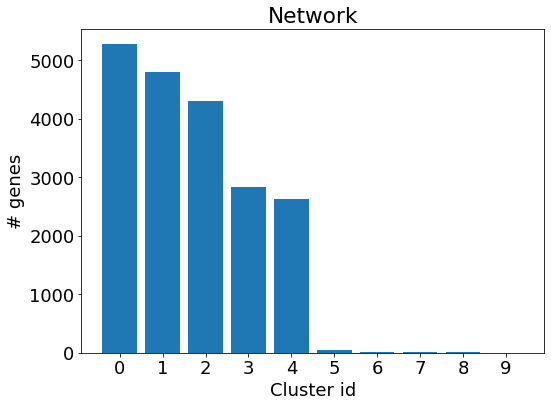

In [8]:
plot_gene_cnt_each_cluster_v2(louvain_module, 'Network')

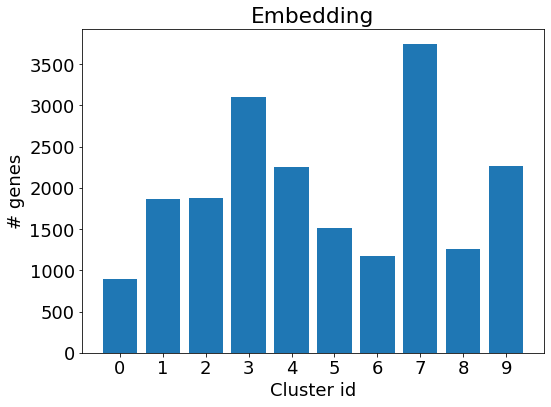

In [9]:
# note that cluster 0 in an embedding is not the same as cluster 0 in the network 
plot_gene_cnt_each_cluster_v2(kmeans, 'Embedding')

## Evaluation 2: compare percentage of DEGs per network module vs percentage of DEGs per embedding cluster

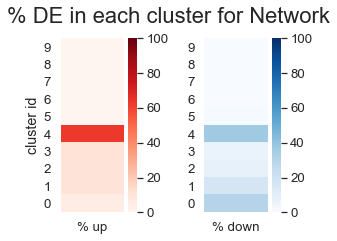

In [10]:
cluster_DE_perc(louvain_module, 'Network', deseq)

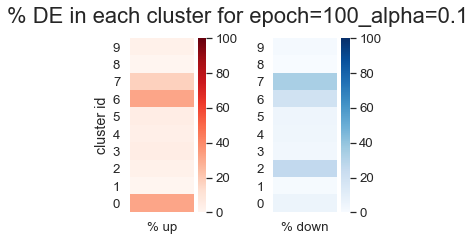

In [11]:
cluster_DE_perc(kmeans, emb_name, deseq)

## Evaluation 3: compare module membership and embedding cluster membership overlap by jaccard

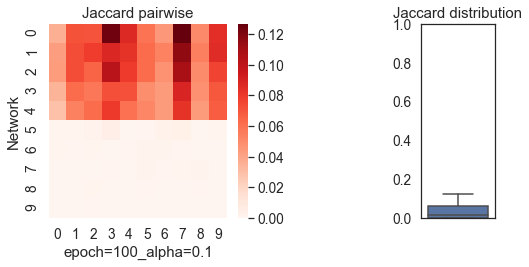

In [12]:
cluster_jaccard_v2(louvain_module, kmeans, ['Network', emb_name])

## Evaluation 3: Percentage of significant genes for each network module vs percentage of significant genes for each embedding cluster

In [13]:
expression_meta = pd.read_csv('../data/notebooks/Module 1-4 outputs/expression_meta_Apr6.csv', low_memory = False)

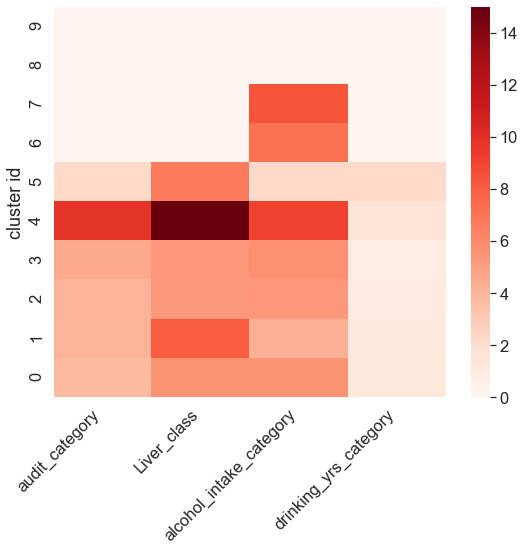

CPU times: user 2min 49s, sys: 4.01 s, total: 2min 53s
Wall time: 2min 52s


In [14]:
%%time
plot_sig_perc(louvain_module, 'louvain', expression_meta)

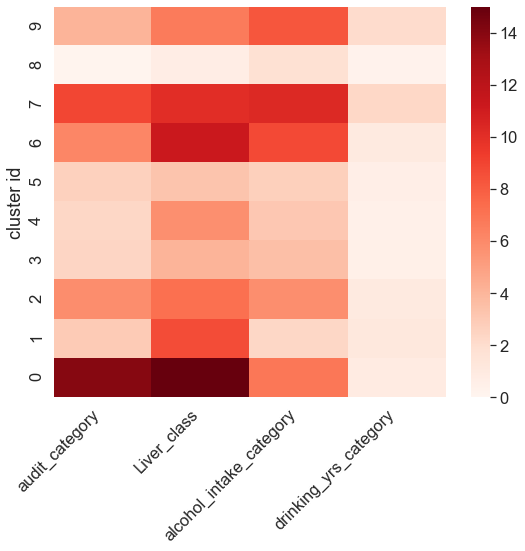

CPU times: user 2min 21s, sys: 453 ms, total: 2min 22s
Wall time: 2min 21s


In [15]:
%%time
plot_sig_perc(kmeans, emb_name, expression_meta)

## Evaluation 3: Module eigengene and alcohol trait correlation for each network module vs module eigengene and alcohol trait correlation for each embedding cluster

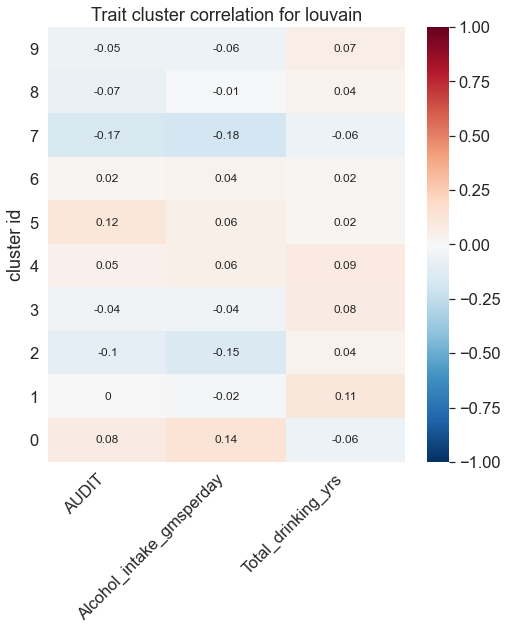

CPU times: user 9.83 s, sys: 1.77 s, total: 11.6 s
Wall time: 2.95 s


In [16]:
%%time
network_cluster_corr = cluster_phenotype_corr(louvain_module, 'louvain', expression_meta, output_corr_df = True)

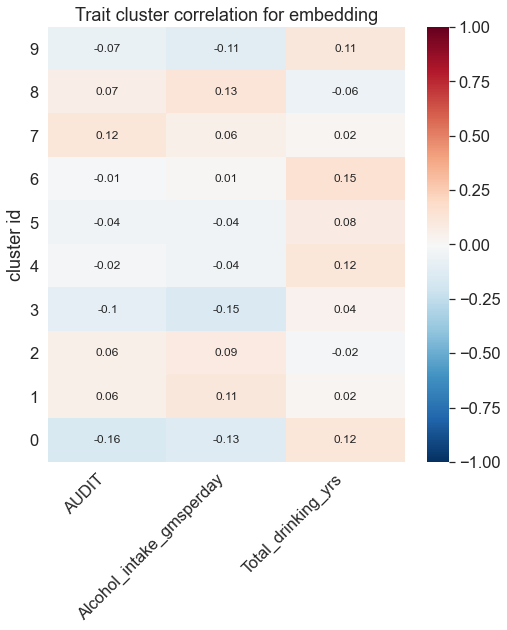

CPU times: user 16.1 s, sys: 3.24 s, total: 19.3 s
Wall time: 3.21 s


In [17]:
%%time
embedding_cluster_corr = cluster_phenotype_corr(kmeans, 'embedding', expression_meta, output_corr_df = True)

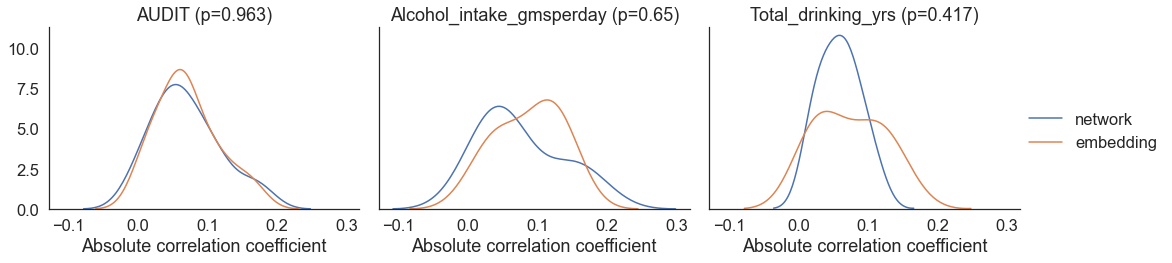

In [18]:
plot_corr_kde([network_cluster_corr,embedding_cluster_corr], ['network', 'embedding'], 'network vs embedding')

In [19]:
print('NMI between network modules and embedding clusters is')
cluster_nmi_v3(louvain_module, kmeans)

NMI between network modules and embedding clusters is


0.554